# Multilayer Perceptron from MNIST raw data using Keras

This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

We assume you are using TF 2.

## Loading the packages

In [97]:
# First, import TF and get its version.
# !pip install --upgrade tensorflow
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [0]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# ... import here the different keras libraries you need
from tensorflow.keras.datasets import  cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import regularizers


%matplotlib inline

## Loading the raw data
Keras provides easy access to different datasets including MNIST. First load the `mnist` dataset and normalize it to be in the range [0, 1]

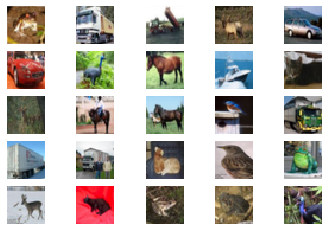

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [99]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

show_imgs(X_train)
print(X_train.shape)
print(X_test.shape)

In [100]:
X_train = X_train.reshape(50000, 32*32*3)
X_test = X_test.reshape(10000, 32*32*3)
X_train =  X_train.astype('float32')                     # ...                     change the type towards float32
X_test =   X_test.astype('float32')                      # ...                     idem

max = np.max(X_train)
min = np.min(X_train)
X_train = 2*((X_train- min)/(max-min))-1                 # ...                     normalize the range to be between 0.0 and 1.0
X_test =  2*((X_test- min)/(max-min))-1                  # ...

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [101]:
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes)  # modify targets to 1-hot using utils.to_categorical()
Y_test = utils.to_categorical(y_test, n_classes)    # idem 
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


# One-layer network and weight visualisation
## Define the network

In [102]:
E = 5                 # number of epochs
B = 128               # batch size
D = X_train.shape[1]     # dimension of input sample - 1024 for Cifar10
V = 0.05

# ... define the model as a Sequential type
# ... add a layer of type Dense with softmax activation

model = Sequential()
model.add(Dense(units=n_classes, input_shape=(D, ), activation='softmax', kernel_regularizer=regularizers.l2(V)))

# ... print model infomration with summary() method
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [103]:
# ... compile the model with a crossentropy loss, rmsprop optimizer 
#      and defining metrics to be stored as history of the training

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 2s 45us/sample - loss: 2.1062 - accuracy: 0.3508 - val_loss: 1.8888 - val_accuracy: 0.3805
Epoch 2/5
50000/50000 [==============================] - 2s 39us/sample - loss: 1.8969 - accuracy: 0.3649 - val_loss: 1.9059 - val_accuracy: 0.3654
Epoch 3/5
50000/50000 [==============================] - 2s 37us/sample - loss: 1.8922 - accuracy: 0.3688 - val_loss: 1.8932 - val_accuracy: 0.3689
Epoch 4/5
50000/50000 [==============================] - 2s 36us/sample - loss: 1.8902 - accuracy: 0.3682 - val_loss: 1.8940 - val_accuracy: 0.3566
Epoch 5/5
50000/50000 [==============================] - 2s 36us/sample - loss: 1.8955 - accuracy: 0.3650 - val_loss: 1.8907 - val_accuracy: 0.3674


## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

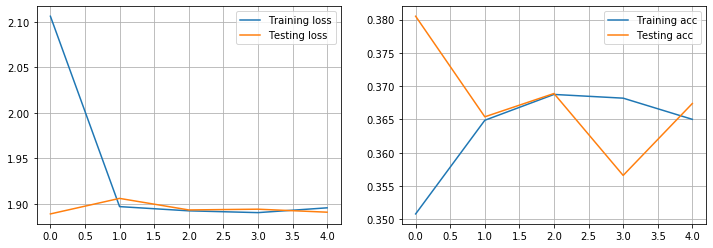

In [104]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [105]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.8907192821502685
Test accuracy: 0.3674


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [106]:
pred = model.predict_classes(X_test, verbose=1)
confusion_matrix(y_test, pred)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

array([[451,  49,  94,  47,  42,  56,  21,  46, 130,  64],
       [ 59, 445,  22,  80,  26,  28,  48,  63,  76, 153],
       [103,  28, 197, 146, 165,  70, 170,  69,  35,  17],
       [ 17,  46,  87, 363,  80, 123, 122,  54,  61,  47],
       [ 63,  25,  98, 144, 271,  47, 200, 122,  14,  16],
       [ 25,  26,  75, 236,  90, 267, 103,  76,  81,  21],
       [  9,  29,  57, 192, 109,  35, 472,  39,  25,  33],
       [ 42,  32,  64, 124, 134,  48,  68, 394,  47,  47],
       [214,  79,  28,  41,  15,  38,  14,  28, 403, 140],
       [ 98, 171,  19,  68,  46,  20,  42,  47,  78, 411]])

### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(3072, 10)
(10,)


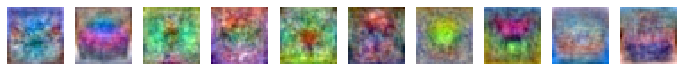

In [107]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:,i]                           #...        get the weights landing to neuron i
    im = im.reshape(32, 32, 3)             #...        reshape the vector of weights into 32x32X3 image

    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)                    #...        get the min of im
    max = np.max(im)                    #...        get the max of im
    im = (im - min)/(max-min) * 255     #...        perform a min-max norm
    im = np.round(im).astype(int)       #...        convert to 8 bits pixel values
    ax.axis('off')
    ax.imshow(im)

# Two-layer network 
## Define the network

In [92]:
num_classes = 10
E = 30                 # number of epochs
B = 128                # batch size
U = 128
D = X_train.shape[1]     # dimension of input sample - 1024 for Cifar10

# ... define the model as a Sequential type
# ... add a layer of type Dense with softmax activation

model = Sequential()
model.add(Dense(units=U, input_shape=(D, ), activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# ... print model infomration with summary() method
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [93]:
# ... compile the model with a crossentropy loss, rmsprop optimizer 
#      and defining metrics to be stored as history of the training

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 90us/sample - loss: 1.7049 - accuracy: 0.4118 - val_loss: 1.6007 - val_accuracy: 0.4344
Epoch 2/30
50000/50000 [==============================] - 4s 84us/sample - loss: 1.4736 - accuracy: 0.4872 - val_loss: 1.5434 - val_accuracy: 0.4681
Epoch 3/30
50000/50000 [==============================] - 4s 80us/sample - loss: 1.3728 - accuracy: 0.5239 - val_loss: 1.4624 - val_accuracy: 0.4932
Epoch 4/30
50000/50000 [==============================] - 4s 84us/sample - loss: 1.3067 - accuracy: 0.5477 - val_loss: 1.4430 - val_accuracy: 0.4974
Epoch 5/30
50000/50000 [==============================] - 4s 88us/sample - loss: 1.2535 - accuracy: 0.5657 - val_loss: 1.4347 - val_accuracy: 0.4974
Epoch 6/30
50000/50000 [==============================] - 4s 85us/sample - loss: 1.2118 - accuracy: 0.5780 - val_loss: 1.4199 - val_accuracy: 0.5119
Epoch 7/30
50000/50000 [==============================] 

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

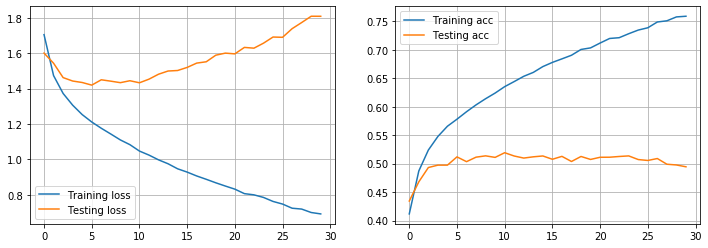

In [94]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [95]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.8085349534988404
Test accuracy: 0.4945
